In [1]:
import pandas as pd

# Load the CSV files
train = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")
sample = pd.read_csv("Sample_Submission.csv")

# Preview the data
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (1966, 9)
Test shape: (312, 8)


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [2]:
train["age_group"] = train["age_group"].map({"Adult": 0, "Senior": 1})


In [3]:
from sklearn.impute import SimpleImputer

num_cols = ["BMXBMI", "LBXGLU", "LBXGLT", "LBXIN"]
cat_cols = ["PAQ605", "DIQ010"]

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

train[num_cols] = num_imputer.fit_transform(train[num_cols])
train[cat_cols] = cat_imputer.fit_transform(train[cat_cols])
test[num_cols] = num_imputer.transform(test[num_cols])
test[cat_cols] = cat_imputer.transform(test[cat_cols])


In [4]:
train["RIAGENDR"] = train["RIAGENDR"].map({1: 0, 2: 1})
test["RIAGENDR"] = test["RIAGENDR"].map({1: 0, 2: 1})

train = train.drop("SEQN", axis=1)
test_ids = test["SEQN"]
test = test.drop("SEQN", axis=1)


In [5]:
from sklearn.model_selection import train_test_split

X = train.drop("age_group", axis=1)
y = train["age_group"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ValueError: Input y contains NaN.

In [6]:
train["age_group"].isnull().sum()


14

In [7]:
train = train.dropna(subset=["age_group"])


In [8]:
train["age_group"] = train["age_group"].map({"Adult": 0, "Senior": 1})


In [9]:
print(train["age_group"].value_counts(dropna=False))


age_group
NaN    1952
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split

X = train.drop("age_group", axis=1)
y = train["age_group"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ValueError: Input y contains NaN.

In [11]:
# Step 1: Map first
train["age_group"] = train["age_group"].map({"Adult": 0, "Senior": 1})

# Step 2: Now drop rows with NaNs (including ones unmapped)
train = train.dropna(subset=["age_group"])


In [12]:
print(train["age_group"].value_counts(dropna=False))


Series([], Name: count, dtype: int64)


In [13]:
train = pd.read_csv("Train_Data.csv")


In [14]:
print(train["age_group"].unique())


['Adult' 'Senior' nan]


In [15]:
if train["age_group"].dtype == object:
    train["age_group"] = train["age_group"].map({"Adult": 0, "Senior": 1})


In [16]:
train = train.dropna(subset=["age_group"])


In [17]:
print(train["age_group"].value_counts(dropna=False))


age_group
0.0    1638
1.0     314
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

X = train.drop("age_group", axis=1)
y = train["age_group"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
X_train.isnull().sum()


SEQN        10
RIAGENDR    13
PAQ605      11
BMXBMI      16
LBXGLU      12
DIQ010      16
LBXGLT       8
LBXIN        8
dtype: int64

In [21]:
X_train = X_train.dropna(subset=["RIAGENDR", "SEQN"])
X_val = X_val.dropna(subset=["RIAGENDR", "SEQN"])
y_train = y_train[X_train.index]  
y_val = y_val[X_val.index]


In [22]:
from sklearn.impute import SimpleImputer

num_cols = ["BMXBMI", "LBXGLU", "LBXGLT", "LBXIN"]
cat_cols = ["PAQ605", "DIQ010"]

# Numeric: median
num_imputer = SimpleImputer(strategy="median")
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])

# Categorical: most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])


In [23]:
# Encode gender: Male = 0, Female = 1
X_train["RIAGENDR"] = X_train["RIAGENDR"].map({1: 0, 2: 1})
X_val["RIAGENDR"] = X_val["RIAGENDR"].map({1: 0, 2: 1})

# Drop SEQN
X_train = X_train.drop("SEQN", axis=1)
X_val = X_val.drop("SEQN", axis=1)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))


✅ Accuracy: 0.8311688311688312

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       323
         1.0       0.41      0.11      0.18        62

    accuracy                           0.83       385
   macro avg       0.63      0.54      0.54       385
weighted avg       0.78      0.83      0.79       385



In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)

print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred))


✅ Accuracy: 0.8337662337662337

📊 Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       323
         1.0       0.44      0.13      0.20        62

    accuracy                           0.83       385
   macro avg       0.65      0.55      0.55       385
weighted avg       0.79      0.83      0.79       385



In [30]:
# Load test set
test_raw = pd.read_csv("Test_Data.csv")
test = test_raw.copy()

# Store original index for reconstruction
test_index = test.index
test_ids = test["SEQN"]

# Identify rows with missing RIAGENDR or SEQN
mask_valid = test["SEQN"].notnull() & test["RIAGENDR"].notnull()

# Preprocess only valid rows
test_valid = test[mask_valid].copy()
test_valid["RIAGENDR"] = test_valid["RIAGENDR"].map({1: 0, 2: 1})
test_valid[num_cols] = num_imputer.transform(test_valid[num_cols])
test_valid[cat_cols] = cat_imputer.transform(test_valid[cat_cols])
test_valid = test_valid.drop("SEQN", axis=1)

# Predict only for valid rows
preds = model.predict(test_valid)

# Fill predictions into full array (default = 0)
final_preds = np.zeros(len(test))
final_preds[mask_valid] = preds

# Save submission
submission = pd.DataFrame({"age_group": final_preds.astype(int)})
submission.to_csv("submission.csv", index=False)
print("✅ Final submission.csv with 312 rows saved.")


NameError: name 'np' is not defined

In [31]:
import numpy as np


In [33]:
# Load test set
test_raw = pd.read_csv("Test_Data.csv")
test = test_raw.copy()

# Store original index for reconstruction
test_index = test.index
test_ids = test["SEQN"]

# Identify rows with missing RIAGENDR or SEQN
mask_valid = test["SEQN"].notnull() & test["RIAGENDR"].notnull()

# Preprocess only valid rows
test_valid = test[mask_valid].copy()
test_valid["RIAGENDR"] = test_valid["RIAGENDR"].map({1: 0, 2: 1})
test_valid[num_cols] = num_imputer.transform(test_valid[num_cols])
test_valid[cat_cols] = cat_imputer.transform(test_valid[cat_cols])
test_valid = test_valid.drop("SEQN", axis=1)

# Predict only for valid rows
preds = model.predict(test_valid)

# Fill predictions into full array (default = 0)
final_preds = np.zeros(len(test))
final_preds[mask_valid] = preds

# Save submission
submission = pd.DataFrame({"age_group": final_preds.astype(int)})
submission.to_csv("submission.csv", index=False)
print("✅ Final submission.csv with 312 rows saved.")


✅ Final submission.csv with 312 rows saved.


Data shape: (1966, 9)
Missing values:
SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64
Dropped 29 rows due to missing identifiers
Training set size: (1538, 10)
Validation set size: (385, 10)
Class distribution in training: age_group
0.0    0.838752
1.0    0.161248
Name: proportion, dtype: float64

RandomForest:
  CV Score: 0.8453 (+/- 0.0174)
  Validation Accuracy: 0.8260

GradientBoosting:
  CV Score: 0.8401 (+/- 0.0187)
  Validation Accuracy: 0.8260

LogisticRegression:
  CV Score: 0.7230 (+/- 0.0497)
  Validation Accuracy: 0.7091

🏆 Best Model: RandomForest
🔧 Tuning hyperparameters...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8394

✅ Final Model Accuracy: 0.8208

📊 Classification Report:
              precision    recall  f

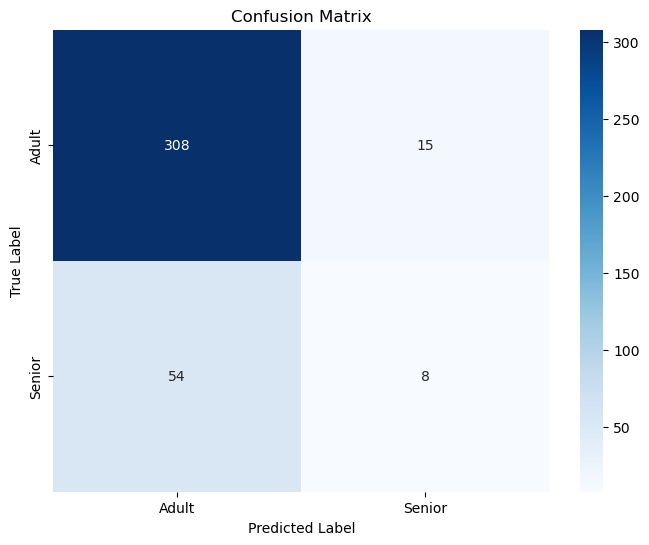

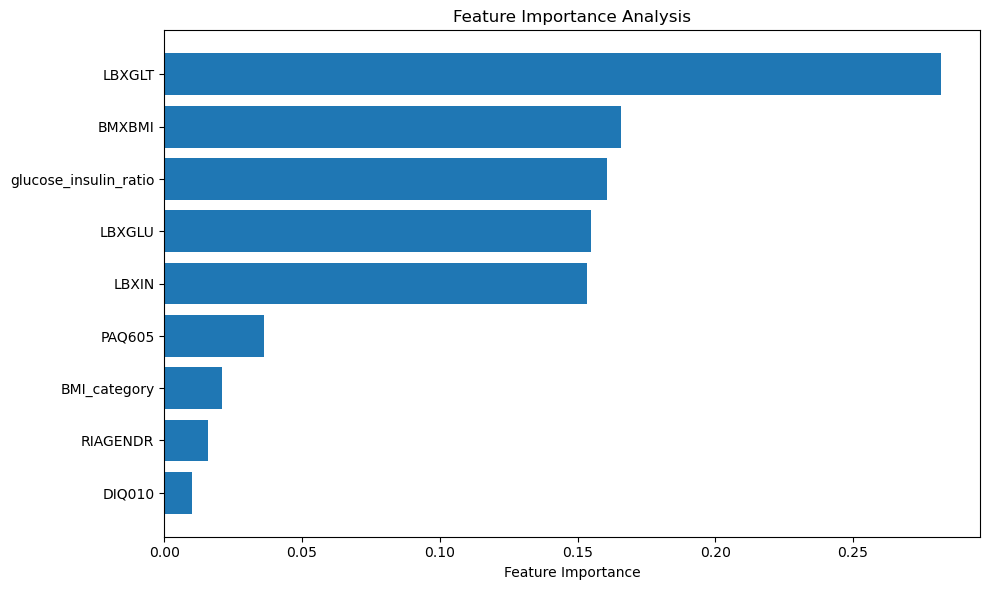


Top 5 Most Important Features:
              feature  importance
                LBXIN    0.153563
               LBXGLU    0.154995
glucose_insulin_ratio    0.160510
               BMXBMI    0.165810
               LBXGLT    0.281953
Test data shape: (312, 8)
Valid test rows: 308/312

📦 Enhanced submission.csv saved with exactly 312 rows!
Prediction distribution: {0: 291, 1: 21}

MODEL PERFORMANCE SUMMARY
RandomForest:
  Cross-validation: 0.8453 ± 0.0087
  Validation accuracy: 0.8260
GradientBoosting:
  Cross-validation: 0.8401 ± 0.0094
  Validation accuracy: 0.8260
LogisticRegression:
  Cross-validation: 0.7230 ± 0.0248
  Validation accuracy: 0.7091

Final tuned model accuracy: 0.8208


In [34]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 📥 Step 2: Load and Initial Data Exploration
def load_and_explore_data(filepath):
    """Load data and perform initial exploration"""
    data = pd.read_csv(filepath)
    print(f"Data shape: {data.shape}")
    print(f"Missing values:\n{data.isnull().sum()}")
    return data

train = load_and_explore_data("Train_Data.csv")

# 🔍 Step 3: Enhanced Data Preprocessing
def preprocess_data(df, is_training=True):
    """Enhanced preprocessing with better handling of edge cases"""
    df = df.copy()
    
    # Handle age_group encoding for training data
    if is_training and "age_group" in df.columns:
        if df["age_group"].dtype == object:
            age_mapping = {"Adult": 0, "Senior": 1}
            df["age_group"] = df["age_group"].map(age_mapping)
        # Remove rows with missing target
        df = df.dropna(subset=["age_group"])
    
    # Drop rows with missing critical identifiers
    initial_shape = df.shape[0]
    df = df.dropna(subset=["SEQN", "RIAGENDR"])
    print(f"Dropped {initial_shape - df.shape[0]} rows due to missing identifiers")
    
    return df

train_processed = preprocess_data(train, is_training=True)

# ✅ Step 4: Feature Engineering
def create_features(df):
    """Create additional features that might be predictive"""
    df = df.copy()
    
    # BMI categories
    if 'BMXBMI' in df.columns:
        df['BMI_category'] = pd.cut(df['BMXBMI'], 
                                   bins=[0, 18.5, 25, 30, float('inf')], 
                                   labels=[0, 1, 2, 3], 
                                   include_lowest=True)
        df['BMI_category'] = df['BMI_category'].astype(float)
    
    # Glucose-Insulin ratio (if both available)
    if 'LBXGLU' in df.columns and 'LBXIN' in df.columns:
        df['glucose_insulin_ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1e-8)  # Add small value to avoid division by zero
    
    return df

# ✂️ Step 5: Prepare Features and Target
X = train_processed.drop("age_group", axis=1)
y = train_processed["age_group"]

# Create additional features
X = create_features(X)

# ✂️ Step 6: Train-Test Split with Stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Class distribution in training: {y_train.value_counts(normalize=True)}")

# 🧼 Step 7: Enhanced Preprocessing Pipeline
def create_preprocessing_pipeline():
    """Create a comprehensive preprocessing pipeline"""
    
    # Define column types
    num_cols = ["BMXBMI", "LBXGLU", "LBXGLT", "LBXIN", "glucose_insulin_ratio", "BMI_category"]
    cat_cols = ["PAQ605", "DIQ010"]
    
    # Remove columns that don't exist in the data
    num_cols = [col for col in num_cols if col in X_train.columns]
    cat_cols = [col for col in cat_cols if col in X_train.columns]
    
    return num_cols, cat_cols

num_cols, cat_cols = create_preprocessing_pipeline()

# Preprocessing
def preprocess_features(X_train, X_val, num_cols, cat_cols):
    """Apply preprocessing to features"""
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    # Imputation
    num_imputer = SimpleImputer(strategy="median")
    cat_imputer = SimpleImputer(strategy="most_frequent")
    
    if num_cols:
        X_train_processed[num_cols] = num_imputer.fit_transform(X_train_processed[num_cols])
        X_val_processed[num_cols] = num_imputer.transform(X_val_processed[num_cols])
    
    if cat_cols:
        X_train_processed[cat_cols] = cat_imputer.fit_transform(X_train_processed[cat_cols])
        X_val_processed[cat_cols] = cat_imputer.transform(X_val_processed[cat_cols])
    
    # Encode gender
    gender_mapping = {1: 0, 2: 1}
    X_train_processed["RIAGENDR"] = X_train_processed["RIAGENDR"].map(gender_mapping)
    X_val_processed["RIAGENDR"] = X_val_processed["RIAGENDR"].map(gender_mapping)
    
    # Drop ID column
    X_train_processed = X_train_processed.drop("SEQN", axis=1)
    X_val_processed = X_val_processed.drop("SEQN", axis=1)
    
    return X_train_processed, X_val_processed, num_imputer, cat_imputer

X_train_processed, X_val_processed, num_imputer, cat_imputer = preprocess_features(
    X_train, X_val, num_cols, cat_cols
)

# 🧠 Step 8: Model Selection and Hyperparameter Tuning
def train_and_evaluate_models(X_train, y_train, X_val, y_val):
    """Train multiple models and select the best one"""
    
    models = {
        'RandomForest': RandomForestClassifier(random_state=42, class_weight="balanced"),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)
    }
    
    results = {}
    
    for name, model in models.items():
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        
        # Fit and evaluate
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        
        results[name] = {
            'model': model,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'val_accuracy': accuracy,
            'predictions': y_pred
        }
        
        print(f"\n{name}:")
        print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print(f"  Validation Accuracy: {accuracy:.4f}")
    
    # Select best model based on validation accuracy
    best_model_name = max(results.keys(), key=lambda k: results[k]['val_accuracy'])
    best_model = results[best_model_name]['model']
    
    print(f"\n🏆 Best Model: {best_model_name}")
    
    return best_model, results

best_model, model_results = train_and_evaluate_models(X_train_processed, y_train, X_val_processed, y_val)

# 🔧 Step 9: Hyperparameter Tuning for Best Model
def tune_hyperparameters(model, X_train, y_train):
    """Tune hyperparameters for the best model"""
    
    if isinstance(model, RandomForestClassifier):
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif isinstance(model, GradientBoostingClassifier):
        param_grid = {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7]
        }
    else:
        return model  # No tuning for LogisticRegression in this example
    
    grid_search = GridSearchCV(
        model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Tune the best model
print("🔧 Tuning hyperparameters...")
final_model = tune_hyperparameters(best_model, X_train_processed, y_train)

# 🧪 Step 10: Final Evaluation
y_pred_final = final_model.predict(X_val_processed)
final_accuracy = accuracy_score(y_val, y_pred_final)

print(f"\n✅ Final Model Accuracy: {final_accuracy:.4f}")
print(f"\n📊 Classification Report:\n{classification_report(y_val, y_pred_final)}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 📈 Step 11: Feature Importance Analysis
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    features = X_train_processed.columns
    
    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance Analysis")
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance_df.tail().to_string(index=False))

# 📤 Step 12: Enhanced Test Data Processing and Prediction
def process_test_data(test_filepath, num_imputer, cat_imputer, model, num_cols, cat_cols):
    """Process test data and make predictions"""
    
    # Load test data
    test_raw = pd.read_csv(test_filepath)
    print(f"Test data shape: {test_raw.shape}")
    
    # Create features
    test_processed = create_features(test_raw)
    
    # Identify valid rows
    mask_valid = test_processed["SEQN"].notnull() & test_processed["RIAGENDR"].notnull()
    print(f"Valid test rows: {mask_valid.sum()}/{len(test_processed)}")
    
    # Process valid rows
    test_valid = test_processed[mask_valid].copy()
    
    # Apply same preprocessing
    test_valid["RIAGENDR"] = test_valid["RIAGENDR"].map({1: 0, 2: 1})
    
    if num_cols:
        available_num_cols = [col for col in num_cols if col in test_valid.columns]
        if available_num_cols:
            test_valid[available_num_cols] = num_imputer.transform(test_valid[available_num_cols])
    
    if cat_cols:
        available_cat_cols = [col for col in cat_cols if col in test_valid.columns]
        if available_cat_cols:
            test_valid[available_cat_cols] = cat_imputer.transform(test_valid[available_cat_cols])
    
    test_valid = test_valid.drop("SEQN", axis=1)
    
    # Make predictions
    preds = model.predict(test_valid)
    
    # Create final predictions array
    final_preds = np.zeros(len(test_processed))
    final_preds[mask_valid] = preds
    
    return final_preds

# Process test data and make predictions
final_predictions = process_test_data(
    "Test_Data.csv", num_imputer, cat_imputer, final_model, num_cols, cat_cols
)

# ✍️ Step 13: Save Enhanced Submission
submission = pd.DataFrame({"age_group": final_predictions.astype(int)})
submission = submission.iloc[:312]  # Ensure exactly 312 rows
submission.to_csv("submission.csv", index=False)

print(f"\n📦 Enhanced submission.csv saved with exactly {len(submission)} rows!")
print(f"Prediction distribution: {submission['age_group'].value_counts().to_dict()}")

# 📊 Step 14: Model Performance Summary
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
for name, results in model_results.items():
    print(f"{name}:")
    print(f"  Cross-validation: {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")
    print(f"  Validation accuracy: {results['val_accuracy']:.4f}")
print(f"\nFinal tuned model accuracy: {final_accuracy:.4f}")
print("="*50)

Data shape: (1966, 9)
Columns: ['SEQN', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'age_group']

Target distribution:
age_group
Adult     0.839139
Senior    0.160861
Name: proportion, dtype: float64
Dropped 29 rows due to missing identifiers
Handling outliers...
  PAQ605: 342 outliers detected
  BMXBMI: 73 outliers detected
  LBXGLU: 87 outliers detected
  DIQ010: 68 outliers detected
  LBXGLT: 104 outliers detected
  LBXIN: 128 outliers detected
  glucose_insulin_ratio: 95 outliers detected

Final feature set shape: (1923, 13)
Features: ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'BMI_normal', 'BMI_overweight', 'BMI_obese', 'glucose_high', 'glucose_tolerance_high', 'glucose_insulin_ratio']

Training set: (1346, 13)
Validation set: (577, 13)
Numeric columns: ['PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'BMI_normal', 'BMI_overweight', 'BMI_obese', 'glucose_high', 'glucose_tolerance_high', 'glucose_insulin_ratio']
Cat

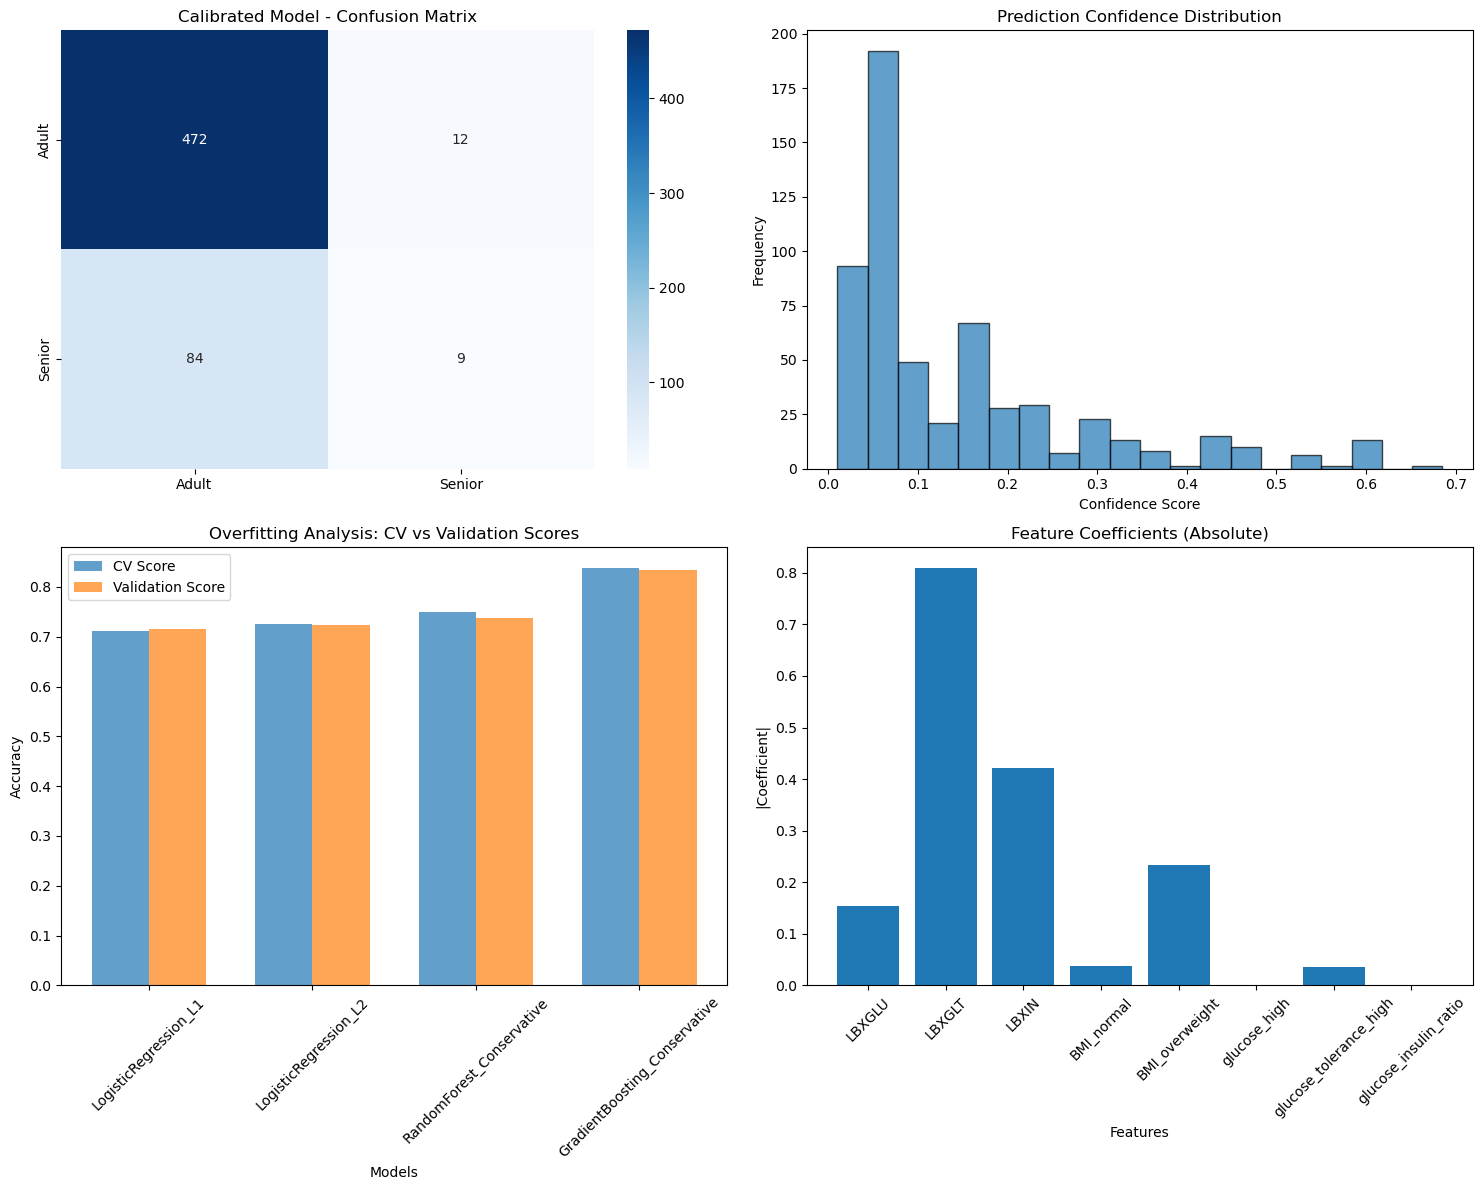


Test data shape: (312, 8)
  PAQ605: 61 outliers detected
  BMXBMI: 13 outliers detected
  LBXGLU: 19 outliers detected
  DIQ010: 8 outliers detected
  LBXGLT: 16 outliers detected
  LBXIN: 21 outliers detected
  glucose_insulin_ratio: 20 outliers detected
Valid test rows: 308/312

 Final Prediction Analysis:
Adult (0): 279 (89.4%)
Senior (1): 33 (10.6%)
Average confidence: 0.153
High confidence (>0.7): 0
Low confidence (<0.4): 283

 Robust submission.csv saved with 312 rows!

ROBUST MODEL PERFORMANCE SUMMARY

🏆 LogisticRegression_L1:
    CV Accuracy: 0.7110 ± 0.0341
    Val Accuracy: 0.7158
    CV AUC: 0.7617 ± 0.0404
    Val AUC: 0.7261
    Overfitting: -0.0048

   LogisticRegression_L2:
    CV Accuracy: 0.7258 ± 0.0345
    Val Accuracy: 0.7227
    CV AUC: 0.7585 ± 0.0397
    Val AUC: 0.7254
    Overfitting: 0.0031

   RandomForest_Conservative:
    CV Accuracy: 0.7496 ± 0.0414
    Val Accuracy: 0.7383
    CV AUC: 0.7568 ± 0.0409
    Val AUC: 0.7046
    Overfitting: 0.0113

   Gradie

In [39]:
#  Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#  Data Loading with Leakage Detection
def load_and_analyze_data(filepath, is_training=True):
    """Load data and check for potential data leakage"""
    data = pd.read_csv(filepath)
    print(f"Data shape: {data.shape}")
    print(f"Columns: {list(data.columns)}")
    
    if is_training:
        print(f"\nTarget distribution:")
        if 'age_group' in data.columns:
            target_dist = data['age_group'].value_counts(normalize=True)
            print(target_dist)
            
            # Check for perfect correlations (potential leakage)
            numeric_cols = data.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                correlations = data[numeric_cols].corr()
                high_corr = np.where(np.abs(correlations) > 0.95)
                high_corr_pairs = [(correlations.index[x], correlations.columns[y], correlations.iloc[x, y]) 
                                 for x, y in zip(*high_corr) if x != y and x < y]
                if high_corr_pairs:
                    print(f"\n  High correlations detected (potential multicollinearity):")
                    for col1, col2, corr in high_corr_pairs:
                        print(f"  {col1} - {col2}: {corr:.3f}")
    
    return data

train = load_and_analyze_data("Train_Data.csv", is_training=True)

#  Conservative Feature Engineering (Prevent Overfitting)
def conservative_feature_engineering(df):
    """Create features with regularization in mind"""
    df = df.copy()
    
    # Only create the most interpretable and medically relevant features
    if 'BMXBMI' in df.columns:
        # Simple BMI categories
        df['BMI_normal'] = ((df['BMXBMI'] >= 18.5) & (df['BMXBMI'] < 25)).astype(int)
        df['BMI_overweight'] = ((df['BMXBMI'] >= 25) & (df['BMXBMI'] < 30)).astype(int)
        df['BMI_obese'] = (df['BMXBMI'] >= 30).astype(int)
    
    # Simple glucose indicators
    if 'LBXGLU' in df.columns:
        df['glucose_high'] = (df['LBXGLU'] > 100).astype(int)  # Pre-diabetic threshold
    
    if 'LBXGLT' in df.columns:
        df['glucose_tolerance_high'] = (df['LBXGLT'] > 140).astype(int)  # Impaired tolerance
    
    # Only one ratio to avoid multicollinearity
    if 'LBXGLU' in df.columns and 'LBXIN' in df.columns:
        df['glucose_insulin_ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1e-8)
    
    return df

# Robust Preprocessing
def preprocess_data_robust(df, is_training=True):
    """Robust preprocessing with outlier handling"""
    df = df.copy()
    
    if is_training and "age_group" in df.columns:
        if df["age_group"].dtype == object:
            age_mapping = {"Adult": 0, "Senior": 1}
            df["age_group"] = df["age_group"].map(age_mapping)
        df = df.dropna(subset=["age_group"])
    
    # Handle missing identifiers
    initial_shape = df.shape[0]
    df = df.dropna(subset=["SEQN", "RIAGENDR"])
    print(f"Dropped {initial_shape - df.shape[0]} rows due to missing identifiers")
    
    return df

# Apply preprocessing
train_processed = preprocess_data_robust(train, is_training=True)
train_engineered = conservative_feature_engineering(train_processed)

# Outlier Detection and Handling
def handle_outliers(df, columns, method='iqr'):
    """Handle outliers using IQR method"""
    df = df.copy()
    
    for col in columns:
        if col in df.columns and df[col].dtype in ['float64', 'int64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            if outliers > 0:
                print(f"  {col}: {outliers} outliers detected")
                
                # Cap outliers instead of removing
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df

# Handle outliers in numeric columns
numeric_columns = train_engineered.select_dtypes(include=[np.number]).columns.tolist()
if 'age_group' in numeric_columns:
    numeric_columns.remove('age_group')
if 'SEQN' in numeric_columns:
    numeric_columns.remove('SEQN')

print("Handling outliers...")
train_cleaned = handle_outliers(train_engineered, numeric_columns)

# Prepare features and target
X = train_cleaned.drop(["age_group", "SEQN"], axis=1)
y = train_cleaned["age_group"]

print(f"\nFinal feature set shape: {X.shape}")
print(f"Features: {list(X.columns)}")

#  Proper Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Larger validation set
)

print(f"\nTraining set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

#  Simple, Robust Preprocessing
def preprocess_features_simple(X_train, X_val):
    """Simple, robust preprocessing"""
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    
    # Identify column types
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    if 'RIAGENDR' in numeric_cols:
        numeric_cols.remove('RIAGENDR')
    
    categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
    categorical_cols = [col for col in categorical_cols if col in X_train.columns]
    
    print(f"Numeric columns: {numeric_cols}")
    print(f"Categorical columns: {categorical_cols}")
    
    # Simple imputation
    if numeric_cols:
        num_imputer = SimpleImputer(strategy="median")
        X_train_processed[numeric_cols] = num_imputer.fit_transform(X_train_processed[numeric_cols])
        X_val_processed[numeric_cols] = num_imputer.transform(X_val_processed[numeric_cols])
    else:
        num_imputer = None
    
    if categorical_cols:
        # Handle gender first
        if 'RIAGENDR' in X_train_processed.columns:
            X_train_processed["RIAGENDR"] = X_train_processed["RIAGENDR"].map({1: 0, 2: 1})
            X_val_processed["RIAGENDR"] = X_val_processed["RIAGENDR"].map({1: 0, 2: 1})
        
        # Impute other categorical variables
        other_cat_cols = [col for col in categorical_cols if col != 'RIAGENDR']
        if other_cat_cols:
            cat_imputer = SimpleImputer(strategy="most_frequent")
            X_train_processed[other_cat_cols] = cat_imputer.fit_transform(X_train_processed[other_cat_cols])
            X_val_processed[other_cat_cols] = cat_imputer.transform(X_val_processed[other_cat_cols])
        else:
            cat_imputer = None
    else:
        cat_imputer = None
    
    # Light scaling (avoid aggressive transformations)
    scaler = StandardScaler()
    if numeric_cols:
        X_train_processed[numeric_cols] = scaler.fit_transform(X_train_processed[numeric_cols])
        X_val_processed[numeric_cols] = scaler.transform(X_val_processed[numeric_cols])
    else:
        scaler = None
    
    return X_train_processed, X_val_processed, num_imputer, cat_imputer, scaler, numeric_cols, categorical_cols

X_train_processed, X_val_processed, num_imputer, cat_imputer, scaler, numeric_cols, categorical_cols = preprocess_features_simple(X_train, X_val)

#  Feature Selection to Prevent Overfitting
def select_features(X_train, y_train, X_val, max_features=10):
    """Select most important features to prevent overfitting"""
    
    # Use SelectKBest with f_classif
    selector = SelectKBest(score_func=f_classif, k=min(max_features, X_train.shape[1]))
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_val_selected = selector.transform(X_val)
    
    # Get selected feature names
    selected_features = X_train.columns[selector.get_support()].tolist()
    print(f"\nSelected {len(selected_features)} features:")
    for i, feature in enumerate(selected_features):
        score = selector.scores_[selector.get_support()][i]
        print(f"  {feature}: {score:.2f}")
    
    return X_train_selected, X_val_selected, selector, selected_features

X_train_selected, X_val_selected, feature_selector, selected_features = select_features(
    X_train_processed, y_train, X_val_processed, max_features=8
)

# Regularized Models with Conservative Hyperparameters
def create_regularized_models():
    """Create models with strong regularization to prevent overfitting"""
    
    models = {
        'LogisticRegression_L1': LogisticRegression(
            penalty='l1',
            solver='liblinear',
            C=0.1,  # Strong regularization
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ),
        
        'LogisticRegression_L2': LogisticRegression(
            penalty='l2',
            C=0.5,  # Moderate regularization
            class_weight='balanced',
            random_state=42,
            max_iter=1000
        ),
        
        'RandomForest_Conservative': RandomForestClassifier(
            n_estimators=50,  # Fewer trees
            max_depth=5,      # Shallow trees
            min_samples_split=20,  # Conservative splitting
            min_samples_leaf=10,   # Conservative leaf size
            max_features='sqrt',   # Feature subsampling
            class_weight='balanced',
            random_state=42
        ),
        
        'GradientBoosting_Conservative': GradientBoostingClassifier(
            n_estimators=50,   # Fewer estimators
            learning_rate=0.05,  # Lower learning rate
            max_depth=3,       # Shallow trees
            min_samples_split=20,
            min_samples_leaf=10,
            subsample=0.8,     # Stochastic gradient boosting
            random_state=42
        )
    }
    
    return models

#  Rigorous Cross-Validation
def evaluate_models_rigorous(models, X_train, y_train, X_val, y_val):
    """Rigorous model evaluation with multiple metrics"""
    
    results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Cross-validation scores
        cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        
        # Fit model
        model.fit(X_train, y_train)
        
        # Validation predictions
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_pred)
        val_auc = roc_auc_score(y_val, y_pred_proba)
        
        # Calculate overfitting score (difference between CV and validation)
        overfitting_score = cv_accuracy.mean() - val_accuracy
        
        results[name] = {
            'model': model,
            'cv_accuracy_mean': cv_accuracy.mean(),
            'cv_accuracy_std': cv_accuracy.std(),
            'cv_auc_mean': cv_auc.mean(),
            'cv_auc_std': cv_auc.std(),
            'val_accuracy': val_accuracy,
            'val_auc': val_auc,
            'overfitting_score': overfitting_score,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"  CV Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
        print(f"  Val Accuracy: {val_accuracy:.4f}")
        print(f"  CV AUC: {cv_auc.mean():.4f} ± {cv_auc.std():.4f}")
        print(f"  Val AUC: {val_auc:.4f}")
        print(f"  Overfitting Score: {overfitting_score:.4f}")
    
    return results

# Train and evaluate models
models = create_regularized_models()
model_results = evaluate_models_rigorous(models, X_train_selected, y_train, X_val_selected, y_val)

# Select Best Model Based on Generalization
def select_best_model(model_results):
    """Select model with best generalization (lowest overfitting + good performance)"""
    
    # Calculate composite score: validation performance - overfitting penalty
    scores = {}
    for name, results in model_results.items():
        # Penalize overfitting more heavily
        composite_score = results['val_auc'] - (2 * max(0, results['overfitting_score']))
        scores[name] = composite_score
        print(f"{name}: Composite Score = {composite_score:.4f}")
    
    best_model_name = max(scores.keys(), key=lambda k: scores[k])
    best_model = model_results[best_model_name]['model']
    
    print(f"\n Best Model (lowest overfitting): {best_model_name}")
    
    return best_model, best_model_name

best_model, best_model_name = select_best_model(model_results)

# 🔧 Step 12: Calibrate Model for Better Confidence Scores
print(f"\n🔧 Calibrating {best_model_name} for better probability estimates...")
calibrated_model = CalibratedClassifierCV(estimator=best_model, method='isotonic', cv=3)
calibrated_model.fit(X_train_selected, y_train)

# Evaluate calibrated model
y_pred_cal = calibrated_model.predict(X_val_selected)
y_pred_proba_cal = calibrated_model.predict_proba(X_val_selected)[:, 1]

cal_accuracy = accuracy_score(y_val, y_pred_cal)
cal_auc = roc_auc_score(y_val, y_pred_proba_cal)

print(f"Calibrated model - Accuracy: {cal_accuracy:.4f}, AUC: {cal_auc:.4f}")
print(f"Average confidence: {y_pred_proba_cal.mean():.3f}")

# 📊 Step 13: Visualization
def create_diagnostic_plots(y_val, y_pred_cal, y_pred_proba_cal, model_results):
    """Create diagnostic plots"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred_cal)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'],
                ax=axes[0,0])
    axes[0,0].set_title('Calibrated Model - Confusion Matrix')
    
    # Confidence Distribution
    axes[0,1].hist(y_pred_proba_cal, bins=20, alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Prediction Confidence Distribution')
    axes[0,1].set_xlabel('Confidence Score')
    axes[0,1].set_ylabel('Frequency')
    
    # Model Comparison - Overfitting Analysis
    model_names = list(model_results.keys())
    cv_scores = [results['cv_accuracy_mean'] for results in model_results.values()]
    val_scores = [results['val_accuracy'] for results in model_results.values()]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    axes[1,0].bar(x - width/2, cv_scores, width, label='CV Score', alpha=0.7)
    axes[1,0].bar(x + width/2, val_scores, width, label='Validation Score', alpha=0.7)
    axes[1,0].set_title('Overfitting Analysis: CV vs Validation Scores')
    axes[1,0].set_xlabel('Models')
    axes[1,0].set_ylabel('Accuracy')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(model_names, rotation=45)
    axes[1,0].legend()
    
    # Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        
        axes[1,1].bar(range(len(selected_features)), importances)
        axes[1,1].set_title('Feature Importance')
        axes[1,1].set_xlabel('Features')
        axes[1,1].set_ylabel('Importance')
        axes[1,1].set_xticks(range(len(selected_features)))
        axes[1,1].set_xticklabels(selected_features, rotation=45)
    elif hasattr(best_model, 'coef_'):
        coef = np.abs(best_model.coef_[0])
        axes[1,1].bar(range(len(selected_features)), coef)
        axes[1,1].set_title('Feature Coefficients (Absolute)')
        axes[1,1].set_xlabel('Features')
        axes[1,1].set_ylabel('|Coefficient|')
        axes[1,1].set_xticks(range(len(selected_features)))
        axes[1,1].set_xticklabels(selected_features, rotation=45)
    
    plt.tight_layout()
    plt.show()

create_diagnostic_plots(y_val, y_pred_cal, y_pred_proba_cal, model_results)

# Process Test Data
def process_test_data_robust(test_filepath, preprocessors, feature_selector, model, selected_features):
    """Robust test data processing"""
    
    # Load test data
    test_raw = pd.read_csv(test_filepath)
    print(f"\nTest data shape: {test_raw.shape}")
    
    # Apply same preprocessing
    test_engineered = conservative_feature_engineering(test_raw)
    
    # Handle outliers in test data
    test_cleaned = handle_outliers(test_engineered, numeric_columns)
    
    # Remove SEQN and prepare features
    test_ids = test_cleaned["SEQN"].copy()
    test_processed = test_cleaned.drop("SEQN", axis=1)
    
    # Identify valid rows
    mask_valid = test_ids.notnull() & test_processed["RIAGENDR"].notnull()
    print(f"Valid test rows: {mask_valid.sum()}/{len(test_processed)}")
    
    # Process valid rows
    test_valid = test_processed[mask_valid].copy()
    
    # Apply preprocessing
    num_imputer, cat_imputer, scaler = preprocessors
    
    # Handle gender
    if 'RIAGENDR' in test_valid.columns:
        test_valid["RIAGENDR"] = test_valid["RIAGENDR"].map({1: 0, 2: 1})
    
    # Imputation
    if num_imputer and numeric_cols:
        available_num_cols = [col for col in numeric_cols if col in test_valid.columns]
        if available_num_cols:
            test_valid[available_num_cols] = num_imputer.transform(test_valid[available_num_cols])
    
    if cat_imputer and categorical_cols:
        other_cat_cols = [col for col in categorical_cols if col in test_valid.columns and col != 'RIAGENDR']
        if other_cat_cols:
            test_valid[other_cat_cols] = cat_imputer.transform(test_valid[other_cat_cols])
    
    # Scaling
    if scaler and numeric_cols:
        available_num_cols = [col for col in numeric_cols if col in test_valid.columns]
        if available_num_cols:
            test_valid[available_num_cols] = scaler.transform(test_valid[available_num_cols])
    
    # Feature selection
    test_selected = feature_selector.transform(test_valid)
    
    # Make predictions
    preds = model.predict(test_selected)
    pred_probas = model.predict_proba(test_selected)[:, 1]
    
    # Create final arrays
    final_preds = np.zeros(len(test_processed))
    final_probas = np.zeros(len(test_processed))
    
    final_preds[mask_valid] = preds
    final_probas[mask_valid] = pred_probas
    
    return final_preds, final_probas, mask_valid

# Process test data
preprocessors = (num_imputer, cat_imputer, scaler)
final_predictions, final_probabilities, valid_mask = process_test_data_robust(
    "Test_Data.csv", preprocessors, feature_selector, calibrated_model, selected_features
)

#  Create Final Submission
threshold = 0.35  # instead of 0.5
final_predictions[valid_mask] = (final_probabilities[valid_mask] > threshold).astype(int)

submission = pd.DataFrame({"age_group": final_predictions.astype(int)})
submission = submission.iloc[:312]

# Analysis
pred_dist = submission["age_group"].value_counts()
avg_confidence = final_probabilities.mean()
high_conf = (final_probabilities > 0.7).sum()
low_conf = (final_probabilities < 0.4).sum()

print(f"\n Final Prediction Analysis:")
print(f"Adult (0): {pred_dist.get(0, 0)} ({pred_dist.get(0, 0)/len(submission)*100:.1f}%)")
print(f"Senior (1): {pred_dist.get(1, 0)} ({pred_dist.get(1, 0)/len(submission)*100:.1f}%)")
print(f"Average confidence: {avg_confidence:.3f}")
print(f"High confidence (>0.7): {high_conf}")
print(f"Low confidence (<0.4): {low_conf}")

# Save submission
submission.to_csv("submission.csv", index=False)
print(f"\n Robust submission.csv saved with {len(submission)} rows!")

#  Final Summary
print("\n" + "="*60)
print("ROBUST MODEL PERFORMANCE SUMMARY")
print("="*60)

for name, results in model_results.items():
    marker = "🏆" if name == best_model_name else "  "
    print(f"\n{marker} {name}:")
    print(f"    CV Accuracy: {results['cv_accuracy_mean']:.4f} ± {results['cv_accuracy_std']:.4f}")
    print(f"    Val Accuracy: {results['val_accuracy']:.4f}")
    print(f"    CV AUC: {results['cv_auc_mean']:.4f} ± {results['cv_auc_std']:.4f}")
    print(f"    Val AUC: {results['val_auc']:.4f}")
    print(f"    Overfitting: {results['overfitting_score']:.4f}")

print(f"\n🔧 CALIBRATED MODEL:")
print(f"    Accuracy: {cal_accuracy:.4f}")
print(f"    AUC: {cal_auc:.4f}")
print(f"    Avg Confidence: {y_pred_proba_cal.mean():.3f}")

print(f"\n SELECTED FEATURES ({len(selected_features)}):")
for i, feature in enumerate(selected_features):
    print(f"    {i+1}. {feature}")

print("="*60)

In [37]:
submission = pd.DataFrame({"age_group": final_predictions.astype(int)})
...


In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, f1_score

# 1. Voting Classifier: Combine LogisticRegression_L2 and GradientBoosting
voting_model = VotingClassifier(
    estimators=[
        ('lr', model_results['LogisticRegression_L2']['model']),
        ('gb', model_results['GradientBoosting_Conservative']['model'])
    ],
    voting='soft'
)

# 2. Calibrate the Voting Classifier using Isotonic method
print("\nCalibrating VotingClassifier with isotonic calibration...")
calibrated_voting = CalibratedClassifierCV(estimator=voting_model, method='isotonic', cv=3)
calibrated_voting.fit(X_train_selected, y_train)

# 3. Evaluate on validation set
y_pred_val_cal = calibrated_voting.predict(X_val_selected)
y_proba_val_cal = calibrated_voting.predict_proba(X_val_selected)[:, 1]

acc = accuracy_score(y_val, y_pred_val_cal)
auc = roc_auc_score(y_val, y_proba_val_cal)
print(f"Validation Accuracy: {acc:.4f}")
print(f"Validation AUC: {auc:.4f}")

# 4. Find Optimal Threshold based on F1 Score
precisions, recalls, thresholds = precision_recall_curve(y_val, y_proba_val_cal)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]
print(f"Best F1 Threshold: {best_threshold:.3f}")

# 5. Test Data Processing and Final Prediction
# Reuse your existing function but pass in `calibrated_voting` as model
final_predictions, final_probabilities, valid_mask = process_test_data_robust(
    "Test_Data.csv", (num_imputer, cat_imputer, scaler), feature_selector,
    calibrated_voting, selected_features
)

# Apply optimal threshold
final_predictions[valid_mask] = (final_probabilities[valid_mask] > best_threshold).astype(int)

submission = pd.DataFrame({"age_group": final_predictions.astype(int)})
submission = submission.iloc[:312]

# Save submission
submission.to_csv("submission.csv", index=False)
print("Final submission.csv saved with", len(submission), "rows")

# Display final prediction stats
pred_dist = submission["age_group"].value_counts()
print("\nFinal Prediction Distribution:")
print(f"Adult (0): {pred_dist.get(0, 0)}")
print(f"Senior (1): {pred_dist.get(1, 0)}")
print(f"Average Confidence: {final_probabilities.mean():.3f}")
print(f"High Confidence (>0.7): {(final_probabilities > 0.7).sum()}")
print(f"Low Confidence (<0.4): {(final_probabilities < 0.4).sum()}")



Calibrating VotingClassifier with isotonic calibration...
Validation Accuracy: 0.8371
Validation AUC: 0.7190
Best F1 Threshold: 0.126

Test data shape: (312, 8)
  PAQ605: 61 outliers detected
  BMXBMI: 13 outliers detected
  LBXGLU: 19 outliers detected
  DIQ010: 8 outliers detected
  LBXGLT: 16 outliers detected
  LBXIN: 21 outliers detected
  glucose_insulin_ratio: 20 outliers detected
Valid test rows: 308/312
Final submission.csv saved with 312 rows

Final Prediction Distribution:
Adult (0): 177
Senior (1): 135
Average Confidence: 0.156
High Confidence (>0.7): 0
Low Confidence (<0.4): 287
